# Part II - Investigation of Factors that have an Effect on Bike Share Duration
## by Michael Mwangi Ndirangu

## Investigation Overview


> In this investigation, I wanted to look at the factors that could be used to predict the duration individuals use a bike share service for. The main focus was on the; Bike duration in seconds, member_birth_year, member_gender, user type, and whether the bike share was used for the duration of the whole trip.  

## Dataset Overview

> The dataset used for analysis is the Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains information with regards to 183,412 observations with regards to 16 variables related to the bike share. Variables include; Bike duration in seconds, member_birth_year, member_gender, user type, and whether the bike share was used for the duration of the whole trip. The dataset can be found in udacity repository here; https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv. 

> Age variable was generated based on the birth_year column. The data was then wrangled to remove null values in the age column and also rows with other gender were removed to allow for comparison among males and females only


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

#generate age varaible and set the type to int
bikes['member_age'] =2022 -bikes['member_birth_year']
bikes['member_age'] =bikes['member_age'].astype(pd.Int64Dtype())

In [3]:
### Wrangle Dataset:
bikes = bikes[bikes['member_age'].notnull()] #remove null values
bikes = bikes[bikes['member_gender']!="Other"] # remove other gender

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Duration in Seconds

> The histogram shows the distribution of the main feature of interest; Duration in seconds. The distribution is highly skewed to the right as there is a long tail to the right. This indicates that there are a few individuals whose bike utilization is much longer than that of the majority. No unsuual points as all points are within 24 hours.

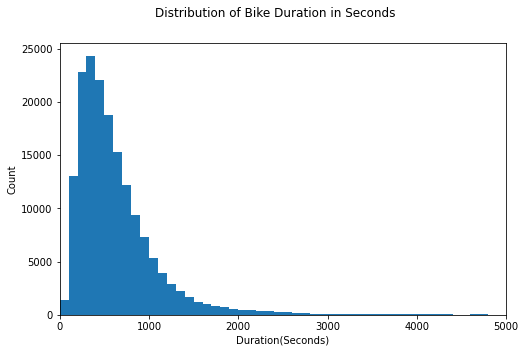

In [4]:
#Histogram plot for duration
binsize = 100
bins = np.arange(0, bikes['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins=bins)
plt.xlabel('Duration(Seconds)')
plt.ylabel('Count')
plt.xlim([0,5000])
plt.suptitle('Distribution of Bike Duration in Seconds')
plt.show()

## Relationship between Duration in Seconds and Age

> The relationship between age and duration in seconds was investigated by using a scatterplot and heat map. Analysis showed that there is a somewhat negative relationship between age and duration. The duration of younger people is somewhat higher for younger geneartion and decreases with increase with age

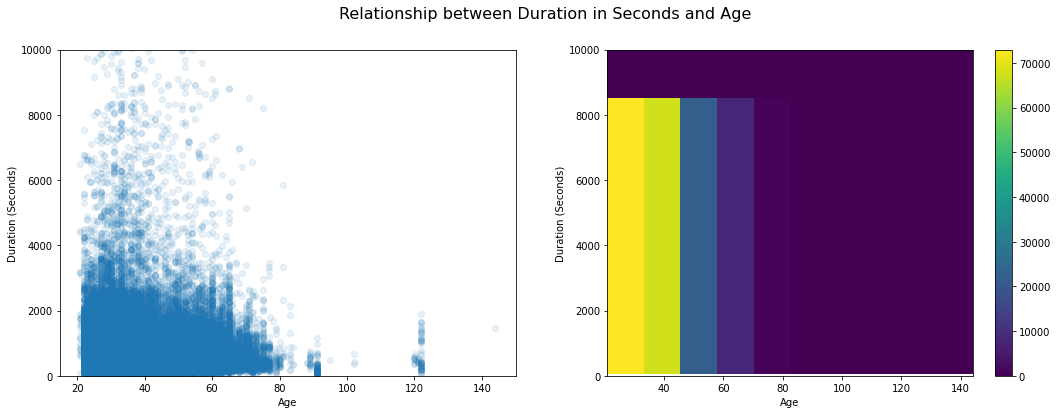

In [5]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = bikes, x = 'member_age', y = 'duration_sec', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Age')
plt.ylabel('Duration (Seconds)')
plt.ylim([0,10000])
plt.suptitle('Relationship between Duration in Seconds and Age',fontsize=16,fontdict={"weight": "bold"});

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = bikes, x = 'member_age', y = 'duration_sec')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration (Seconds)')
plt.ylim([0,10000]);

## Relationship between Duration in Seconds and Bike_share_for_all_trip

> Relationships between duration and the variables bike_share_for_all_trip was also investigated. This was done by use of violinplot,boxplot, and point plot. Based on the plots, there did not appear to be any clear differences between duration and bike_share_for_all_trip.

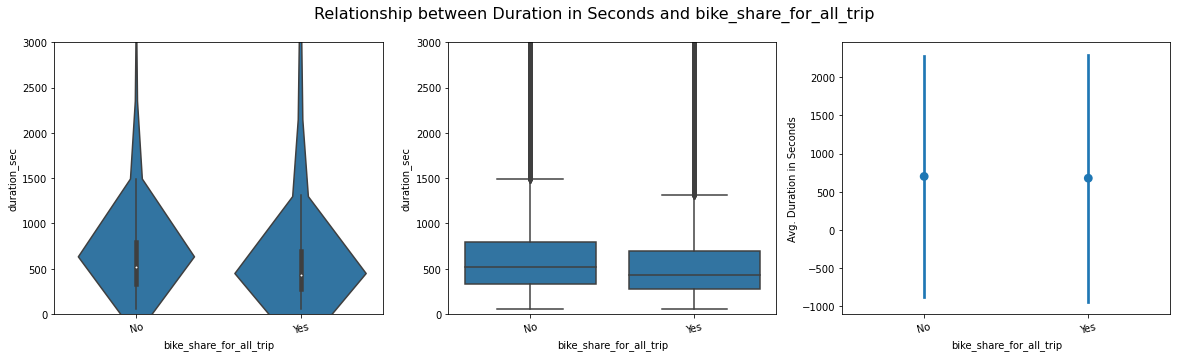

In [15]:
def box_violin_point(col):
    """
    Takes in a categorical column in a dataset and produces its resulting violin, boxplot and
    pointplot with the duration of seconds column
    
    Parameters:
    col (str): The categorical column of interest
  
    Returns:
    Violin, boxplot and pointplot
    """
    # Three PLOTS IN ONE FIGURE
    plt.figure(figsize = [20, 5])
    base_color = sb.color_palette()[0]
    plt.suptitle('Relationship between Duration in Seconds and {}'.format(col),fontsize=16,fontdict={"weight": "bold"});

    # LEFT plot: violin plot
    plt.subplot(1, 3, 1)
    #Let's return the axes object
    ax1 = sb.violinplot(data = bikes, x = col, y = 'duration_sec', color=base_color)
    plt.xticks(rotation=15)
    plt.ylim([0,3000]);

    # Center plot: box plot
    plt.subplot(1, 3, 2)
    sb.boxplot(data = bikes, x = col, y = 'duration_sec', color=base_color)
    plt.xticks(rotation=15);
    plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

    plt.subplot(1, 3, 3)
    sb.pointplot(data=bikes, x = col, y = 'duration_sec', color=base_color, ci='sd', linestyles="")
    plt.xticks(rotation=15);
    plt.ylabel('Avg. Duration in Seconds')
box_violin_point('bike_share_for_all_trip')

## Relationship between Duration in Seconds and Gender
> Relationships between duration and the variable gender was also investigated. This was done by use of violinplot,boxplot, and point plot. Based on the plots, there did not appear to be any clear differences between duration by gender. 

> However, by adding the age variable, then gender becomes a predictor of duration in seconds. For individuals aged below 80, then females have higher durations than males. However, for individuls aged above 80, then males generally have higher duration than females


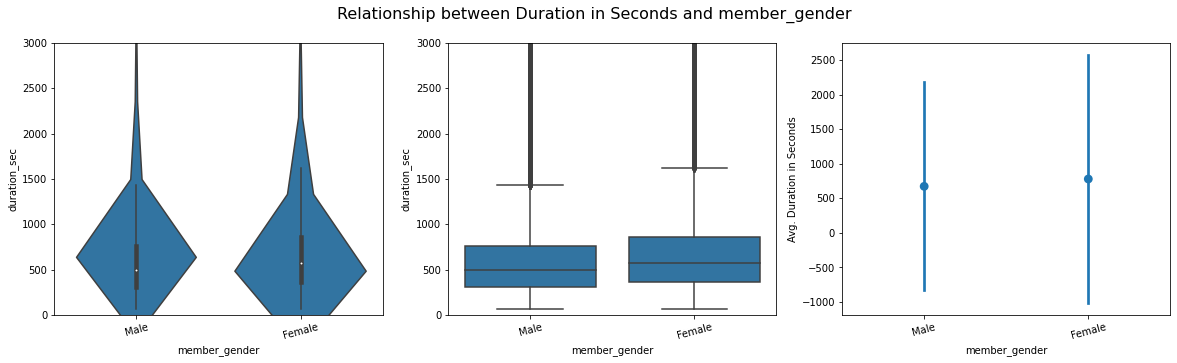

In [6]:
box_violin_point('member_gender')

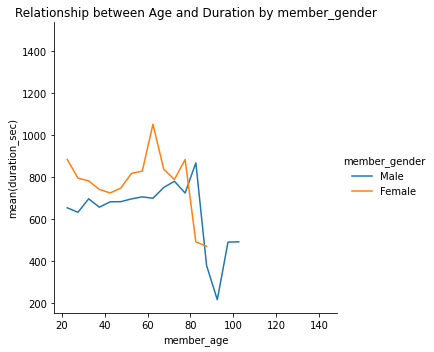

In [10]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

def poly_plot(hue_col):
    """
    Takes in a categorical column in a dataset and produces its resulting mean lineplot with age and average duration columns
    Parameters:
    col (str): The categorical column of interest to form the x axis
  
    Returns:
    mean lineplot of average duration by x_col differentiated by the usertype
    """
    bin_edges = np.arange(5, bikes['member_age'].max()+5, 5)
    g = sb.FacetGrid(data = bikes, hue = hue_col, height = 5).set(title='Relationship between Age and Duration by {}'.format(hue_col))
    g.map(mean_poly, 'member_age', 'duration_sec', bins = bin_edges)
    g.set_ylabels('mean(duration_sec)')
    g.add_legend()
poly_plot('member_gender')

## Relationship between Duration in Seconds and User_type

> Relationships between duration and the variable user_type was also investigated. This was done by use of violinplot,boxplot, and point plot. There were clear differences in duration based on user_type. Customers generally have higher durations than subscribers.

> The relationship is that regardless of the added variables, customers generally have higher duration than subscribers. In other words, regardless of age, gender,or whether the bike share is for the whole trip, a customer will generally have a higher duration than a subscriber. 

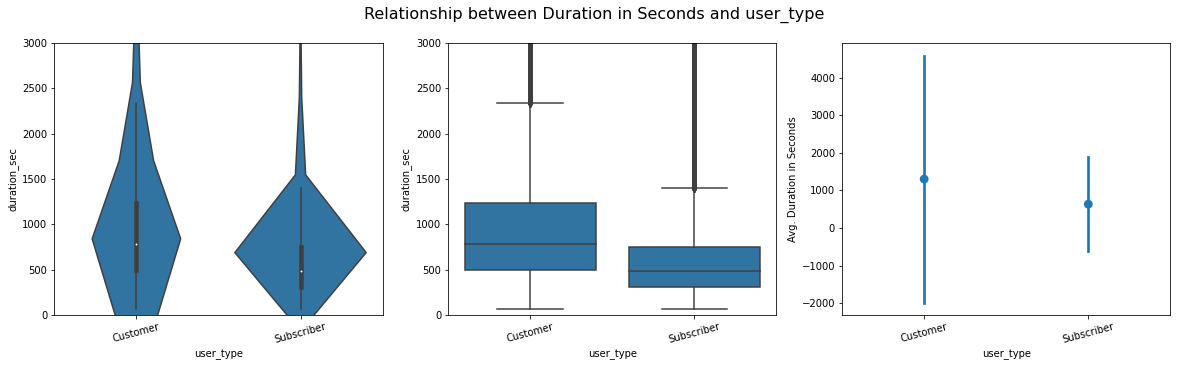

In [11]:
box_violin_point('user_type')

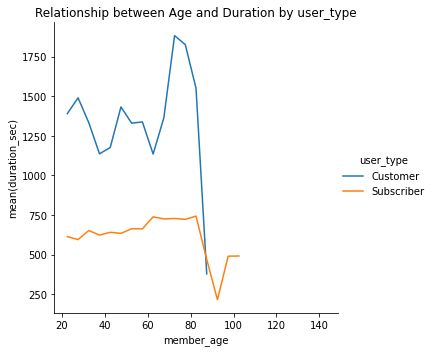

In [13]:
poly_plot('user_type')

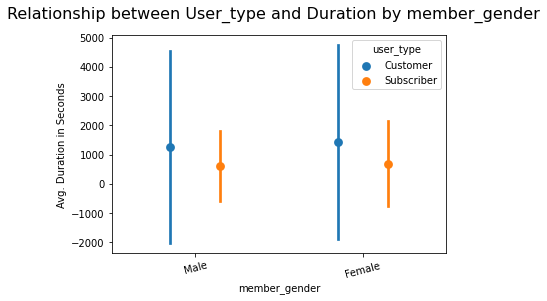

In [14]:
def user_plt(x_col):
    """
    Takes in a categorical column in a dataset and produces its resulting mean pointplot with usertype and average duration columns
    Parameters:
    col (str): The categorical column of interest to form the x axis
  
    Returns:
    pointplot of average duration by x_col differentiated by the usertype
    """
    sb.pointplot(data=bikes, x = x_col, y = 'duration_sec', hue="user_type", dodge = 0.3, ci='sd', linestyles="")
    plt.xticks(rotation=15);
    plt.ylabel('Avg. Duration in Seconds')
    plt.suptitle('Relationship between User_type and Duration by {}'.format(x_col),fontsize=16,fontdict={"weight": "bold"});
user_plt('member_gender')

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt